In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import math
%matplotlib inline

In [2]:
m = pd.read_csv('data/map_data.txt', sep='\t', header=None)

In [3]:
m.columns = ['x','y', 'id']

In [4]:
m.head()

x        y  id
0   92.0640 -34.7770   1
1   61.1090 -47.1320   2
2   17.4200  -4.5993   3
3   -7.1285 -34.5400   4
4  232.3200  32.0320   5

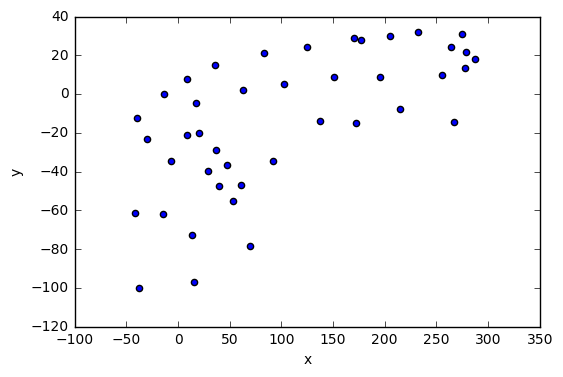

In [5]:
m.plot.scatter('x','y')

In [6]:
controls = pd.read_csv('data/control_data.txt', sep=' ', header=None)

In [7]:
controls.columns = ['v','phi']

In [8]:
controls.head()

v       phi
0  3.9611  3.093700
1  4.0378 -0.008101
2  4.1173  0.005551
3  4.2066  0.011087
4  4.3007 -0.001022

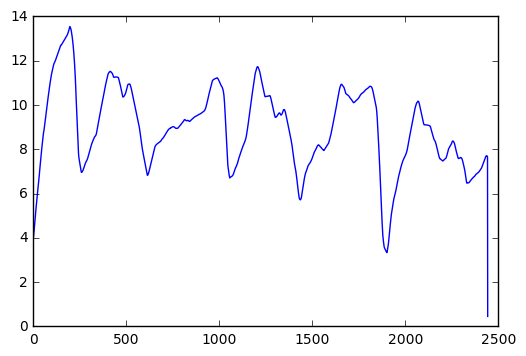

In [9]:
plt.plot(controls.v);

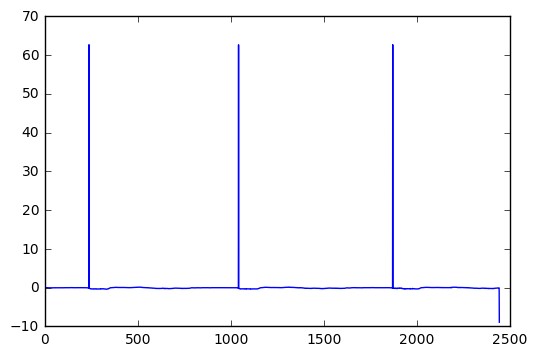

In [10]:
plt.plot(controls.phi);

In [11]:
gt = pd.read_csv('data/gt_data.txt', sep=' ', header=None)

In [12]:
gt.columns = ['x','y','azimuth']

In [13]:
gt.head()

x       y  azimuth
0  6.2785  1.9598  0.00000
1  6.6632  2.0825  0.30937
2  7.0554  2.2076  0.30856
3  7.4561  2.3358  0.30912
4  7.8656  2.4671  0.31022

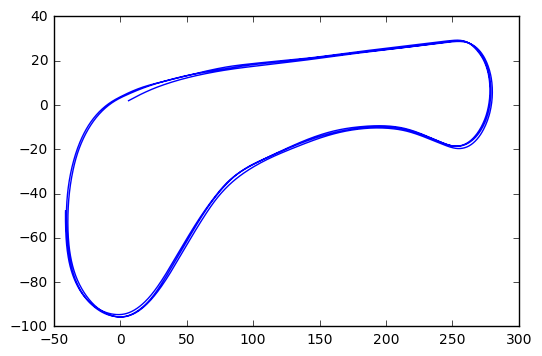

In [14]:
plt.plot(gt.x, gt.y);

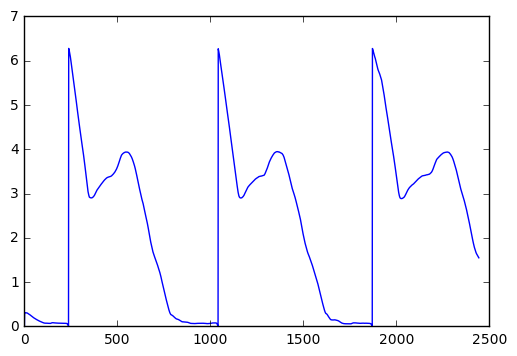

In [15]:
plt.plot(gt.azimuth);

In [16]:
obs_i=3

In [17]:
obs_file = "./data/observation/observations_"+'{0:06d}'.format(obs_i)+".txt"
obs = pd.read_csv(obs_file, sep=' ', header=None)
obs.columns = ['x_car','y_car']
car = gt.loc[obs_i-1]
obs['x'] = obs.x_car * math.cos(car.azimuth) - obs.y_car * math.sin(car.azimuth) + car.x
obs['y'] = obs.x_car * math.sin(car.azimuth) + obs.y_car * math.cos(car.azimuth) + car.y

In [18]:
obs.head()

x_car    y_car          x          y
0   3.2546   4.5852   8.763826   7.564629
1   7.8084  -9.6332  17.420501  -4.599333
2 -20.4200   4.0883 -13.641765  -0.098471
3  -5.9465 -22.4310   8.201744 -20.969900
4   5.6762 -25.2750  20.139212 -20.149921

In [25]:
particles_file = "./data/particles/particles_"+'{0:06d}'.format(obs_i)+".txt"
particles = pd.read_csv(particles_file, sep=' ', header=None)
particles.columns = ['x','y','theta','weight','gtx','gty','gtt']

CParserError: Error tokenizing data. C error: Expected 3 fields in line 201, saw 7


In [115]:
particles.head()

x         y     theta         weight     gtx     gty      gtt
0  9.471910  3.550470  0.305149  3.680330e-173  7.0554  2.2076  0.30856
1  8.637880  2.782290  0.311170   7.977300e-75  7.0554  2.2076  0.30856
2 -3.814980 -1.571040  0.333258   0.000000e+00  7.0554  2.2076  0.30856
3  0.210457  0.648669  0.325697   0.000000e+00  7.0554  2.2076  0.30856
4  9.925340  3.390910  0.307406  2.214760e-229  7.0554  2.2076  0.30856

NameError: name 'particles' is not defined

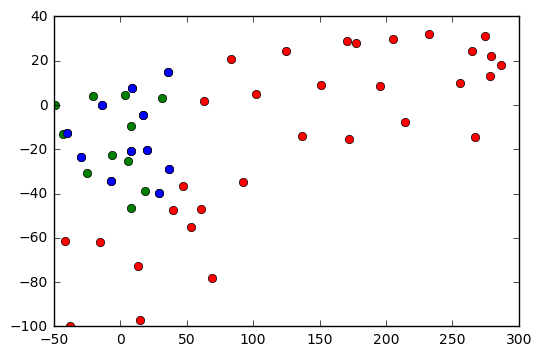

In [20]:
p1 = plt.plot(m.x.tolist(), m.y.tolist(), 'ro')
p2 = plt.plot(obs.x_car.tolist(),obs.y_car.tolist(), 'go')
p3 = plt.plot(obs.x.tolist(),obs.y.tolist(), 'bo')
p4 = plt.plot(particles.x, particles.y, 'yo')
p5 = plt.plot(car.x, car.y, 'co')

plt.title('Map')
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Landmarks', 'observations in vehicle coordinates', 'observations in map coordinates', 'particles', 'vehicle'))
plt.show()